### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [126]:
import pandas as pd
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.cluster import MeanShift, AgglomerativeClustering, SpectralClustering
import umap

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

### Data

In [76]:
filepath = "data/embeddings/hardie+installing+james+siding.pkl"
emb = pd.read_pickle(filepath)

In [131]:
emb

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
post link,,,,,,,,,,,,,,,,,,,,,
/threads/hardie-board-wide-48-batten-anyone-done-it.451833/post-8231324,-0.001718,-0.022822,0.048918,0.023416,-0.074073,-0.004822,0.016040,-0.040311,0.008049,0.020271,...,-0.058510,0.003657,-0.038022,-0.008948,-0.007227,0.005586,0.010962,-0.022590,-0.006814,-0.002061
/threads/how-to-finish-the-top-strip-of-hardie-siding.439578/post-7966259,0.004987,0.020649,0.027359,0.000549,-0.039376,-0.017312,0.002272,-0.044794,0.051665,-0.002187,...,-0.020981,0.000533,-0.036421,-0.021683,-0.006470,0.023037,-0.015268,-0.003983,0.015268,-0.026152
/threads/siding-help.442756/post-8034162,0.013593,0.005979,0.020911,0.013934,-0.047666,-0.026880,0.027882,-0.038010,0.016473,-0.006362,...,-0.011263,-0.003694,-0.028716,-0.016389,0.020174,0.046748,-0.010233,-0.011562,0.004136,0.025461
/threads/hardie-window-drip-cap-andersen-windows.428599/post-7773529,0.002057,0.042645,0.030947,0.020990,-0.016523,-0.006502,0.050964,-0.047918,0.040623,-0.010303,...,0.005315,0.009484,-0.013400,-0.028029,-0.002392,0.037474,-0.010712,-0.040136,0.013439,-0.011327
/threads/exterior-door-jambs-flush-with-sheathing-or-siding.452967/post-8252160,-0.027671,0.018362,0.045672,0.026051,-0.018606,0.058376,0.044464,-0.018490,0.033508,0.027157,...,-0.007593,0.004915,-0.001747,-0.018632,0.012530,0.026051,0.004632,-0.033817,0.009708,0.015828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/threads/carpenter-looking-for-work-charlotte-area.56756/post-652479,-0.017233,0.035720,0.012102,0.026241,-0.024766,-0.030236,-0.050812,0.030419,-0.031829,-0.023539,...,-0.014022,-0.023056,-0.015105,-0.010470,-0.006945,-0.025040,-0.023121,0.004628,-0.000968,-0.047861
/threads/problems-with-hardiplank-colorplus.26634/post-287797,-0.017638,0.004446,0.043352,0.047638,-0.007966,-0.024140,0.024489,-0.049737,0.027507,-0.022405,...,-0.010598,0.023731,-0.008061,-0.010896,-0.016953,0.015233,-0.025947,-0.026778,0.004045,-0.016705
/threads/fiber-cement-color-in-or-paint.15052/post-156616,-0.004965,-0.027572,-0.013997,0.047635,0.013119,-0.014650,0.032591,-0.045051,0.041814,0.022825,...,-0.024566,0.003917,-0.035393,-0.017003,0.004975,0.013031,0.000508,-0.002136,-0.001248,0.014214


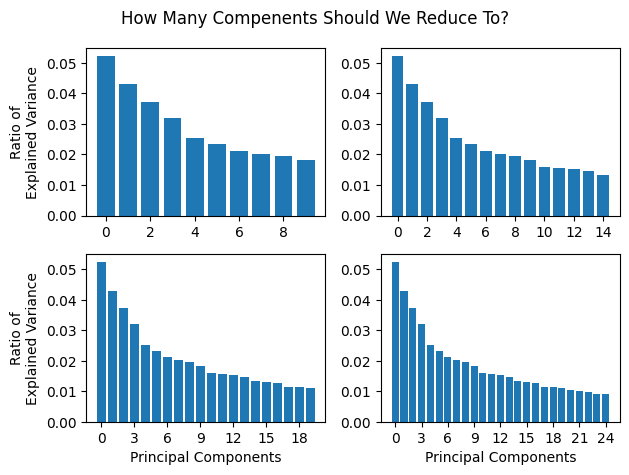

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=2)

n_components = 10
for row in range(2):
    for col in range(2):
        pca = PCA(n_components=n_components)
        pca.fit(emb.values)
        x = range(len(pca.explained_variance_ratio_))
        y = pca.explained_variance_ratio_
        
        ax[row, col].bar(x, y)
        ax[row, col].xaxis.set_major_locator(MaxNLocator(integer=True))

        if row == 1:
            ax[row, col].set_xlabel("Principal Components")
        if col == 0:
            ax[row, col].set_ylabel("Ratio of\nExplained Variance")

        n_components += 5

plt.suptitle("How Many Compenents Should We Reduce To?")
plt.tight_layout()
plt.savefig("principal-component-analysis.png", dpi=200)

#### Ok, let's just go with _10_ components

In [69]:
n_components = 3
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(emb.values)

In [79]:
clustering = MeanShift(cluster_all=False).fit(reduced)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0, -1, -1,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,
        0, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0,
        0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,
        0,  0, -1,  0, -1

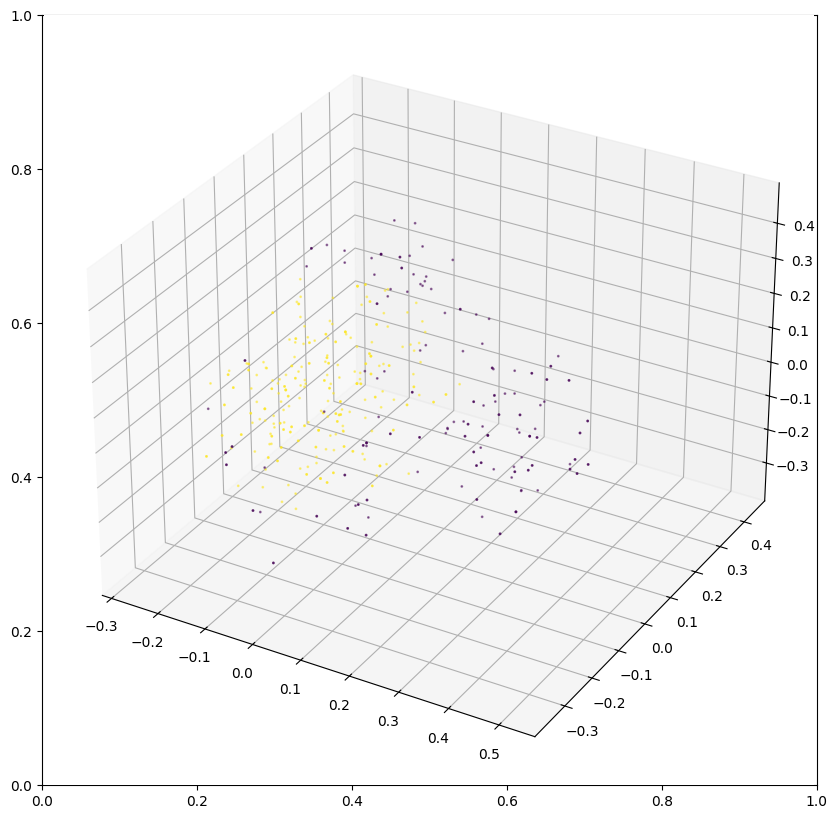

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], alpha=0.5, s=1, c=clustering.labels_)

## SVD

In [86]:
svd = TruncatedSVD(n_components=20, n_iter=7, random_state=42)
svd_reduction = svd.fit_transform(emb.values)

In [87]:
clustering = MeanShift(cluster_all=True).fit(svd_reduction)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### UMAP

In [123]:
reducer = umap.UMAP()
umap_reduction = reducer.fit_transform(emb.values)
umap_reduction.shape

(448, 2)

In [129]:
# clustering = MeanShift(cluster_all=True).fit(umap_reduction)
# clustering = AgglomerativeClustering(n_clusters=4).fit(umap_reduction)
clustering = SpectralClustering(n_clusters=4).fit(umap_reduction)

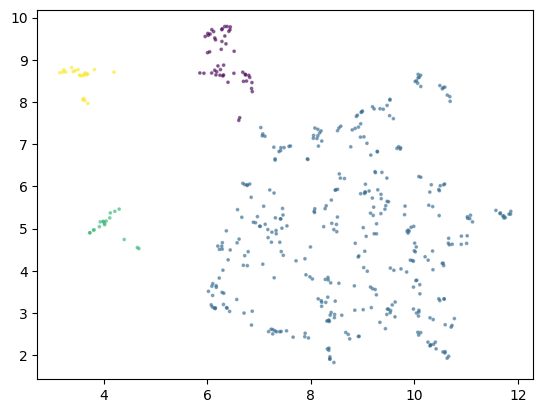

In [130]:
fig, ax = plt.subplots()

x = umap_reduction[:,0]
y = umap_reduction[:,1]
ax.scatter(x, y, c=clustering.labels_, s=3, alpha=0.5)